In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
outfile = "run41-TRB-HUMAN-shared-clones.xlsx"
ptfile = "20210621-DataSheet-RUN41-human-TCRb.csv"

## Read data

In [3]:
df_pt = pd.read_csv(ptfile, sep=",", skiprows=20)
df_pt = df_pt.rename(columns={'Sample': 'SampleInfo'})
df_pt["Sample"] = df_pt["Sample_Name"] + "_" + df_pt["Nr"]
df_pt.head()

,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Run,Nr,...,Species,Chain,Patient,SampleInfo,UMI,Constant,HEK_cells,RACE,MID,Sample
0,N701_S502,BP-T069A-TuH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S1,...,human,TCRb,P53V01,Pre (aliquot A),yes,no,yes,no,NaN,BP-T069A-TuH_S1
1,N702_S502,BP-T070B-TuH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S2,...,human,TCRb,P53V01,Pre (aliquot B),yes,no,yes,no,NaN,BP-T070B-TuH_S2
2,N703_S502,BP-T071C-TuH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S3,...,human,TCRb,P53V01,Pre (aliquot C),yes,no,yes,no,NaN,BP-T071C-TuH_S3
3,N704_S502,BP-T072D-TuH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S4,...,human,TCRb,P53V01,Pre (aliquot D),yes,no,yes,no,NaN,BP-T072D-TuH_S4
4,N705_S502,BP-T073A-TuH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S5,...,human,TCRb,P53V01,Post Stim(aliquot A),yes,no,yes,no,NaN,BP-T073A-TuH_S5


In [4]:
myfiles = [x for x in os.listdir(".") if x.startswith("cdr3-clones") and "TRB" in x]
myfiles

['cdr3-clones-DC4Balance-TRB_HUMAN-after-reassignment.csv',
 'cdr3-clones-Presynoviomics-TRB_HUMAN-after-reassignment.csv']

In [5]:
cols = ['Sample', 'cdr3pep', 'freq']
df = pd.read_csv(myfiles[0], sep="\t")
df = df[cols]
df.head()

,Sample,cdr3pep,freq
0,BP-T069A-TuH_S1,CASSQLAEETQYFG,360
1,BP-T069A-TuH_S1,CASTRSPGANVLTFG,271
2,BP-T069A-TuH_S1,CASSLTGPPAFFG,246
3,BP-T069A-TuH_S1,CSVGTGGTNEKLFFG,186
4,BP-T069A-TuH_S1,CSVLPDSTDTQYFG,168


In [6]:
for myfile in myfiles[1:]:
    df_tmp = pd.read_csv(myfile, sep="\t")
    df_tmp = df_tmp[cols]
    df = df.append(df_tmp)
df.tail()

,Sample,cdr3pep,freq
135227,Bx1481-ST-T_S229,CTSSWDSNSYEQYFG,1
135228,Bx1481-ST-T_S229,CTSSWPGLASWTQYFG,1
135229,Bx1481-ST-T_S229,CVIRPTGDSGYGYTFG,1
135230,Bx1481-ST-T_S229,CVSKQGADTGELFFG,1
135231,Bx1481-ST-T_S229,CVSSPDRGNTQYFG,1


In [7]:
# Merge pt-table with clones
df = pd.merge(df, df_pt, on="Sample")
df.head()

,Sample,cdr3pep,freq,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,...,Sample_Project,Species,Chain,Patient,SampleInfo,UMI,Constant,HEK_cells,RACE,MID
0,BP-T069A-TuH_S1,CASSQLAEETQYFG,360,N701_S502,BP-T069A-TuH,NaN,NaN,NaN,NaN,NaN,...,DC4Balance,human,TCRb,P53V01,Pre (aliquot A),yes,no,yes,no,NaN
1,BP-T069A-TuH_S1,CASTRSPGANVLTFG,271,N701_S502,BP-T069A-TuH,NaN,NaN,NaN,NaN,NaN,...,DC4Balance,human,TCRb,P53V01,Pre (aliquot A),yes,no,yes,no,NaN
2,BP-T069A-TuH_S1,CASSLTGPPAFFG,246,N701_S502,BP-T069A-TuH,NaN,NaN,NaN,NaN,NaN,...,DC4Balance,human,TCRb,P53V01,Pre (aliquot A),yes,no,yes,no,NaN
3,BP-T069A-TuH_S1,CSVGTGGTNEKLFFG,186,N701_S502,BP-T069A-TuH,NaN,NaN,NaN,NaN,NaN,...,DC4Balance,human,TCRb,P53V01,Pre (aliquot A),yes,no,yes,no,NaN
4,BP-T069A-TuH_S1,CSVLPDSTDTQYFG,168,N701_S502,BP-T069A-TuH,NaN,NaN,NaN,NaN,NaN,...,DC4Balance,human,TCRb,P53V01,Pre (aliquot A),yes,no,yes,no,NaN


In [8]:
df = df.groupby(["Patient", "Sample", "cdr3pep"]).agg({'freq': sum})
df = df.reset_index()
df.head()

,Patient,Sample,cdr3pep,freq
0,B13V5,B13V5-PB-T_S225,CAAAESYSGNTIYFG,3
1,B13V5,B13V5-PB-T_S225,CAAAGPYEQYFG,1
2,B13V5,B13V5-PB-T_S225,CAAATQAGVSYEQYFG,1
3,B13V5,B13V5-PB-T_S225,CAADRGGKANQPQHFG,2
4,B13V5,B13V5-PB-T_S225,CAAEGLAGGRQYFG,2


In [9]:
df_total = df.groupby("Sample").agg({"freq": sum})
df_total = df_total.reset_index()
df_total = df_total.rename(columns={'freq': 'totalreads'})
df_total.head()

,Sample,totalreads
0,B13V5-PB-T_S225,57527
1,BB3855-LN-T_S227,53237
2,BB4064-LN-T_S226,94158
3,BB4679-LN-T_S228,47189
4,BB4679-PB-T_S224,60998


In [10]:
df = pd.merge(df, df_total, on="Sample")
df.head()

,Patient,Sample,cdr3pep,freq,totalreads
0,B13V5,B13V5-PB-T_S225,CAAAESYSGNTIYFG,3,57527
1,B13V5,B13V5-PB-T_S225,CAAAGPYEQYFG,1,57527
2,B13V5,B13V5-PB-T_S225,CAAATQAGVSYEQYFG,1,57527
3,B13V5,B13V5-PB-T_S225,CAADRGGKANQPQHFG,2,57527
4,B13V5,B13V5-PB-T_S225,CAAEGLAGGRQYFG,2,57527


In [11]:
df.tail()

,Patient,Sample,cdr3pep,freq,totalreads
659746,P53V07,BP-T095-TuH_S49,CVSSLHQPLVFQPQHFG,1,34849
659747,P53V07,BP-T095-TuH_S49,CVSSSQGNRGRGYTFG,1,34849
659748,P53V07,BP-T095-TuH_S49,CVSSTGGGRKETQYFG,1,34849
659749,P53V07,BP-T095-TuH_S49,CVSSTPPGQGNTEAFFG,1,34849
659750,P53V07,BP-T095-TuH_S49,CVSTRLRTEAFFG,1,34849


In [12]:
df['perc'] = 100 * df['freq'] / df['totalreads']
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,B13V5,B13V5-PB-T_S225,CAAAESYSGNTIYFG,3,57527,0.005215
1,B13V5,B13V5-PB-T_S225,CAAAGPYEQYFG,1,57527,0.001738
2,B13V5,B13V5-PB-T_S225,CAAATQAGVSYEQYFG,1,57527,0.001738
3,B13V5,B13V5-PB-T_S225,CAADRGGKANQPQHFG,2,57527,0.003477
4,B13V5,B13V5-PB-T_S225,CAAEGLAGGRQYFG,2,57527,0.003477


## Determine overlap (shared clones) and the direction

In [13]:
ids = list(df['Sample'].unique())
ids[:10]

['B13V5-PB-T_S225',
 'BB3855-LN-T_S227',
 'BB4064-LN-T_S226',
 'BB4679-LN-T_S228',
 'BB4679-PB-T_S224',
 'Bx1481-ST-T_S229',
 'BP-T103A-TuH_S52',
 'BP-T104B-TuH_S53',
 'BP-T105C-TuH_S54',
 'BP-T106D-TuH_S55']

In [14]:
def directionShared(df, idA, idB):
    df_A = df[df['Sample'] == idA]
    df_B = df[df['Sample'] == idB]
    df_pair = pd.merge(df_A, df_B, on="cdr3pep")
    sum_A = df_pair["perc_x"].sum()
    sum_B = df_pair["perc_y"].sum()
    if sum_B > sum_A:
        idA, idB = idB, idA
        sum_A, sum_B = sum_B, sum_A
    return(idA, idB, sum_A, sum_B)
directionShared(df, "DO-004V3-P5_S123", "DO-004V3-P8_S127")

('DO-004V3-P5_S123', 'DO-004V3-P8_S127', 0.0, 0.0)

In [15]:
sources = list()
targets = list()
impacts_source = list()
impacts_target = list()
for i in range(len(ids)-1):
    for j in range(i+1, len(ids)):
        idA = ids[i]
        idB = ids[j]
        (source, target, impact_source, impact_target) = directionShared(df, idA, idB)
        sources.append(source)
        targets.append(target)
        impacts_source.append(impact_source)
        impacts_target.append(impact_target)
df_shared = pd.DataFrame({'source': sources, 'target': targets, 'impact_source': impacts_source, 'impact_target': impacts_target})
df_shared.head()

,source,target,impact_source,impact_target
0,B13V5-PB-T_S225,BB3855-LN-T_S227,1.567959,1.451998
1,B13V5-PB-T_S225,BB4064-LN-T_S226,2.322388,1.383844
2,B13V5-PB-T_S225,BB4679-LN-T_S228,1.611417,1.343533
3,B13V5-PB-T_S225,BB4679-PB-T_S224,1.698333,1.411522
4,Bx1481-ST-T_S229,B13V5-PB-T_S225,1.024235,0.241626


In [16]:
# Add patient columns for the source and the target
cols = ["Patient", "Sample"]
df_sample_patient = df_pt[cols]
df_shared = pd.merge(df_shared, df_sample_patient, left_on="source", right_on="Sample").rename(columns={"Patient": "patient_source", "Sample": "sample_source"})
df_shared = pd.merge(df_shared, df_sample_patient, left_on="target", right_on="Sample").rename(columns={"Patient": "patient_target", "Sample": "sample_target"})
cols = ["source", "target", "impact_source", "impact_target", "patient_source", "patient_target"]
df_shared = df_shared[cols]
df_shared.head()

,source,target,impact_source,impact_target,patient_source,patient_target
0,B13V5-PB-T_S225,BB3855-LN-T_S227,1.567959,1.451998,B13V5,BB3855
1,Bx1481-ST-T_S229,BB3855-LN-T_S227,1.954703,0.294908,Bx1481,BB3855
2,BP-T103A-TuH_S52,BB3855-LN-T_S227,2.086415,0.995548,P20V01,BB3855
3,BP-T104B-TuH_S53,BB3855-LN-T_S227,2.190639,1.012454,P20V01,BB3855
4,BP-T105C-TuH_S54,BB3855-LN-T_S227,2.232422,1.012454,P20V01,BB3855


In [17]:
# sort on impact on the target and then on impact of the source
df_shared = df_shared.sort_values(by=["impact_target", "impact_source"], ascending=False)
df_shared = df_shared.reset_index()
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target
0,1739,BP-T233C-TuH_S142,BP-T232B-TuH_S141,75.324717,74.088100,P23V01,P23V01
1,1771,BP-T231A-TuH_S140,BP-T232B-TuH_S141,75.575582,74.068825,P23V01,P23V01
2,1827,BP-T231A-TuH_S140,BP-T233C-TuH_S142,74.405312,73.987742,P23V01,P23V01
3,481,BP-T234D-TuH_S143,BP-T231A-TuH_S140,74.677502,73.714295,P23V01,P23V01
4,1798,BP-T234D-TuH_S143,BP-T233C-TuH_S142,74.736208,73.358951,P23V01,P23V01


In [18]:
same_pt = list()
for i in range(len(df_shared)):
    if df_shared['patient_source'][i] == df_shared['patient_target'][i]:
        same_pt.append("same")
    else:
        same_pt.append("different")
df_shared["Same patient"] = same_pt
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,1739,BP-T233C-TuH_S142,BP-T232B-TuH_S141,75.324717,74.088100,P23V01,P23V01,same
1,1771,BP-T231A-TuH_S140,BP-T232B-TuH_S141,75.575582,74.068825,P23V01,P23V01,same
2,1827,BP-T231A-TuH_S140,BP-T233C-TuH_S142,74.405312,73.987742,P23V01,P23V01,same
3,481,BP-T234D-TuH_S143,BP-T231A-TuH_S140,74.677502,73.714295,P23V01,P23V01,same
4,1798,BP-T234D-TuH_S143,BP-T233C-TuH_S142,74.736208,73.358951,P23V01,P23V01,same


In [19]:
df_shared.to_excel(outfile)
print("Wrote", outfile, "to disk")

Wrote run41-TRB-HUMAN-shared-clones.xlsx to disk


## Visualize it

In [20]:
df_shared = df_shared[(df_shared["impact_source"] != 0) & (df_shared["impact_target"] != 0)]
df_shared = df_shared.reset_index()
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,0,1739,BP-T233C-TuH_S142,BP-T232B-TuH_S141,75.324717,74.088100,P23V01,P23V01,same
1,1,1771,BP-T231A-TuH_S140,BP-T232B-TuH_S141,75.575582,74.068825,P23V01,P23V01,same
2,2,1827,BP-T231A-TuH_S140,BP-T233C-TuH_S142,74.405312,73.987742,P23V01,P23V01,same
3,3,481,BP-T234D-TuH_S143,BP-T231A-TuH_S140,74.677502,73.714295,P23V01,P23V01,same
4,4,1798,BP-T234D-TuH_S143,BP-T233C-TuH_S142,74.736208,73.358951,P23V01,P23V01,same


In [21]:
def makeScatter(x,y,txt,color,xlabel,ylabel,plotfile):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(x, y, color=color)

    for i, txt in enumerate(txt):
        ax.annotate(txt, (x[i], y[i]))
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add red dotted line
    ax.plot([-1, 100], [-1, 100], c='w', linestyle=":")
    
    # Save figure to file
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

In [22]:
f = lambda x,y: x + "->" + y
df_shared['txt'] = [x for x in map(f, df_shared['source'], df_shared['target'])]
df_shared['color'] = "blue"
df_shared.loc[df_shared["Same patient"] == "same", 'color'] = "purple"
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient,txt,color
0,0,1739,BP-T233C-TuH_S142,BP-T232B-TuH_S141,75.324717,74.088100,P23V01,P23V01,same,BP-T233C-TuH_S142->BP-T232B-TuH_S141,purple
1,1,1771,BP-T231A-TuH_S140,BP-T232B-TuH_S141,75.575582,74.068825,P23V01,P23V01,same,BP-T231A-TuH_S140->BP-T232B-TuH_S141,purple
2,2,1827,BP-T231A-TuH_S140,BP-T233C-TuH_S142,74.405312,73.987742,P23V01,P23V01,same,BP-T231A-TuH_S140->BP-T233C-TuH_S142,purple
3,3,481,BP-T234D-TuH_S143,BP-T231A-TuH_S140,74.677502,73.714295,P23V01,P23V01,same,BP-T234D-TuH_S143->BP-T231A-TuH_S140,purple
4,4,1798,BP-T234D-TuH_S143,BP-T233C-TuH_S142,74.736208,73.358951,P23V01,P23V01,same,BP-T234D-TuH_S143->BP-T233C-TuH_S142,purple


Wrote run41-TRB-HUMAN-shared-clones-all.pdf to disk


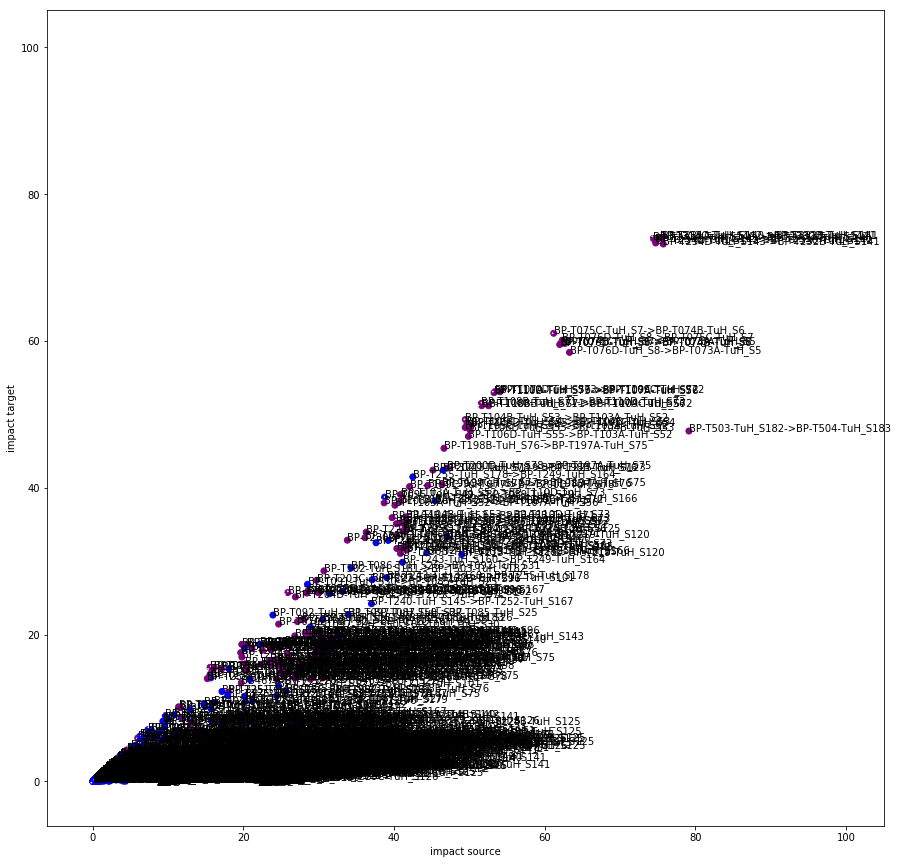

In [23]:
plotfile = outfile.replace(".xlsx", "-all.pdf")
makeScatter(df_shared["impact_source"], df_shared["impact_target"], df_shared['txt'], df_shared['color'], "impact source", "impact target", plotfile)

In [24]:
# Only show things that are different
df_shared_filter = df_shared.copy()
df_shared_filter = df_shared_filter[df_shared_filter["Same patient"] == "different"]
cols = ["source", "target", "impact_source", "impact_target", "Same patient", "txt", "color"]
df_shared_filter = df_shared_filter[cols]
df_shared_filter = df_shared_filter.reset_index()
df_shared_filter.head()

,index,source,target,impact_source,impact_target,Same patient,txt,color
0,28,BP-T213-TuH_S119,BP-T225-TuH_S123,46.541856,42.409753,different,BP-T213-TuH_S119->BP-T225-TuH_S123,blue
1,29,BP-T255-TuH_S178,BP-T249-TuH_S164,42.499017,41.494439,different,BP-T255-TuH_S178->BP-T249-TuH_S164,blue
2,34,BP-T095-TuH_S49,BP-T089-TuH_S29,38.750036,38.727013,different,BP-T095-TuH_S49->BP-T089-TuH_S29,blue
3,35,BP-T239-TuH_S144,BP-T251-TuH_S166,45.438308,38.227211,different,BP-T239-TuH_S144->BP-T251-TuH_S166,blue
4,50,BP-T225-TuH_S123,BP-T219-TuH_S120,47.065403,33.352163,different,BP-T225-TuH_S123->BP-T219-TuH_S120,blue


Wrote run41-TRB-HUMAN-shared-clones-different-ids.pdf to disk


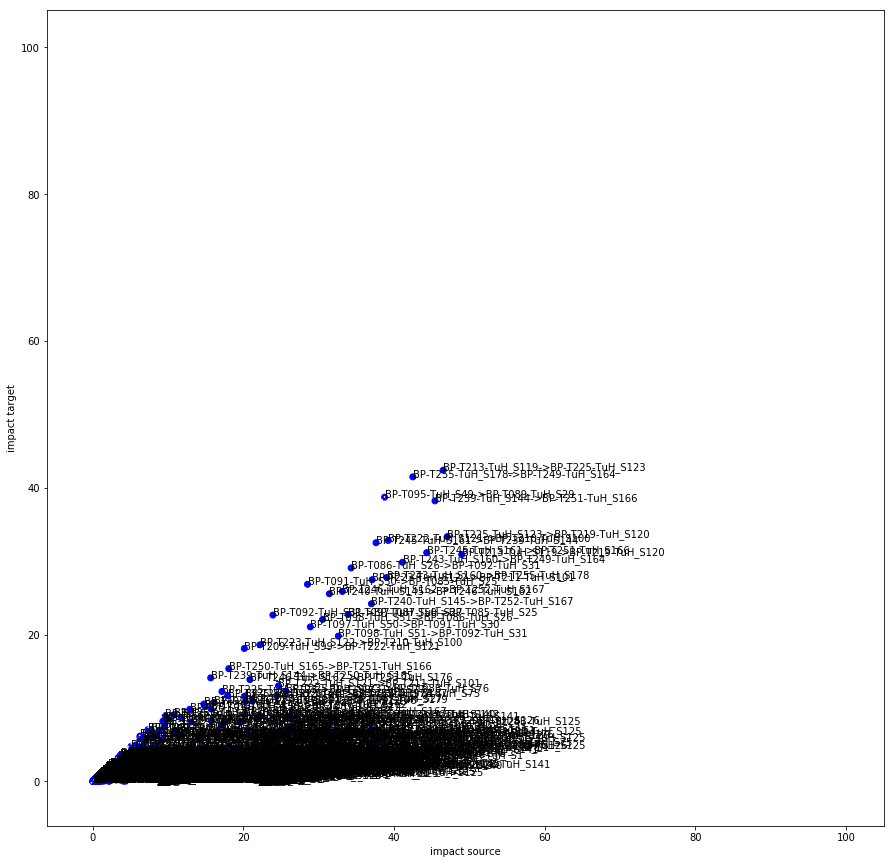

In [25]:
plotfile = outfile.replace(".xlsx", "-different-ids.pdf")
makeScatter(df_shared_filter["impact_source"], df_shared_filter["impact_target"], df_shared_filter['txt'], df_shared_filter['color'], "impact source", "impact target", plotfile)

## Calculate common/public clones

In [26]:
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,B13V5,B13V5-PB-T_S225,CAAAESYSGNTIYFG,3,57527,0.005215
1,B13V5,B13V5-PB-T_S225,CAAAGPYEQYFG,1,57527,0.001738
2,B13V5,B13V5-PB-T_S225,CAAATQAGVSYEQYFG,1,57527,0.001738
3,B13V5,B13V5-PB-T_S225,CAADRGGKANQPQHFG,2,57527,0.003477
4,B13V5,B13V5-PB-T_S225,CAAEGLAGGRQYFG,2,57527,0.003477


In [27]:
concat = lambda x: ", ".join(list(set(x)))
df_clone_occurrence = df.groupby('cdr3pep').agg({'Patient': [pd.Series.nunique, concat], 'Sample': [pd.Series.nunique, concat]})

In [28]:
df_clone_occurrence = df_clone_occurrence.rename(columns={'<lambda>': 'names'})
df_clone_occurrence.head()

Patient          Sample                   
                     nunique   names nunique              names
cdr3pep                                                        
CAAAAGLTADRSSYNEQFFG       1  P53V01       1    BP-T074B-TuH_S6
CAAAATTSTDTQYFG            1  BB4064       1   BB4064-LN-T_S226
CAAADDSGANVLTFG            1  P21V01       1   BP-T197A-TuH_S75
CAAAEEGRITDTQYFG           1  P23V01       1  BP-T229C-TuH_S126
CAAAEGEEEKLFFG             1  P23V01       1  BP-T228B-TuH_S125

In [29]:
# Get percentage columns for each sample
df_pivot = df.pivot_table(index='cdr3pep', columns=['Patient','Sample'], values='perc', aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot.head()

Patient               cdr3pep           B13V5           BB3855  \
Sample                        B13V5-PB-T_S225 BB3855-LN-T_S227   
0        CAAAAGLTADRSSYNEQFFG             NaN              NaN   
1             CAAAATTSTDTQYFG             NaN              NaN   
2             CAAADDSGANVLTFG             NaN              NaN   
3            CAAAEEGRITDTQYFG             NaN              NaN   
4              CAAAEGEEEKLFFG             NaN              NaN   

Patient           BB4064           BB4679                            Bx1481  \
Sample  BB4064-LN-T_S226 BB4679-LN-T_S228 BB4679-PB-T_S224 Bx1481-ST-T_S229   
0                    NaN              NaN              NaN              NaN   
1               0.002124              NaN              NaN              NaN   
2                    NaN              NaN              NaN              NaN   
3                    NaN              NaN              NaN              NaN   
4                    NaN              NaN              NaN              NaN   

Patient           P20V01                                         ...        \
Sample  BP-T103A-TuH_S52 BP-T104B-TuH_S53 BP-T105C-TuH_S54       ...         
0                    NaN              NaN              NaN       ...         
1                    NaN              NaN              NaN       ...         
2                    NaN              NaN              NaN       ...         
3                    NaN              NaN              NaN       ...         
4                    NaN              NaN              NaN       ...         

Patient          P53V01                                                  \
Sample  BP-T086-TuH_S26 BP-T087-TuH_S27 BP-T088-TuH_S28 BP-T089-TuH_S29   
0                   NaN             NaN             NaN             NaN   
1                   NaN             NaN             NaN             NaN   
2                   NaN             NaN             NaN             NaN   
3                   NaN             NaN             NaN             NaN   
4                   NaN             NaN             NaN             NaN   

Patient         P53V010                          P53V07                  \
Sample  BP-T097-TuH_S50 BP-T098-TuH_S51 BP-T091-TuH_S30 BP-T092-TuH_S31   
0                   NaN             NaN             NaN             NaN   
1                   NaN             NaN             NaN             NaN   
2                   NaN             NaN             NaN             NaN   
3                   NaN             NaN             NaN             NaN   
4                   NaN             NaN             NaN             NaN   

Patient                                  
Sample  BP-T094-TuH_S32 BP-T095-TuH_S49  
0                   NaN             NaN  
1                   NaN             NaN  
2                   NaN             NaN  
3                   NaN             NaN  
4                   NaN             NaN  

[5 rows x 79 columns]

In [30]:
df_clone_occurrence = pd.merge(df_clone_occurrence, df_pivot, on='cdr3pep')
df_clone_occurrence = df_clone_occurrence.sort_values(by=[('Patient','nunique'), ('Sample','nunique')], ascending=False)
df_clone_occurrence = df_clone_occurrence.reset_index()
df_clone_occurrence.head()

/data/home/bioinfo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


index         cdr3pep Patient  \
                          nunique   
0  102496          CASSFG      15   
1  160743         CASSLFG      14   
2  187936    CASSLQETQYFG      13   
3  256810   CASSPSTDTQYFG      12   
4  173196  CASSLGSNQPQHFG      12   

                                                      Sample  \
                                               names nunique   
0  Bx1481, P20V01, BB3855, P21V07, P21V010, P23V0...      77   
1  Bx1481, P20V01, BB3855, P23V010, P21V010, P53V...      50   
2  Bx1481, P20V01, BB3855, P23V010, P21V010, P53V...      37   
3  Bx1481, P20V01, BB3855, P23V010, P53V01, P23V0...      36   
4  P23V010, P20V01, BB3855, P21V010, P53V01, P23V...      31   

                                                               B13V5  \
                                               names B13V5-PB-T_S225   
0  B13V5-PB-T_S225, BP-T210-TuH_S100, BP-T219-TuH...        0.126897   
1  B13V5-PB-T_S225, BP-T200D-TuH_S78, BP-T228B-Tu...        0.017383   
2  B13V5-PB-T_S225, BP-T200D-TuH_S78, BP-T228B-Tu...        0.003477   
3  BP-T200D-TuH_S78, BP-T228B-TuH_S125, BP-T234D-...             NaN   
4  B13V5-PB-T_S225, BP-T200D-TuH_S78, BP-T228B-Tu...        0.005215   

            BB3855           BB4064           BB4679       ...        \
  BB3855-LN-T_S227 BB4064-LN-T_S226 BB4679-LN-T_S228       ...         
0         0.161542         0.146562         0.197080       ...         
1         0.015027         0.006372         0.016953       ...         
2         0.005635              NaN         0.010596       ...         
3         0.001878         0.018055         0.016953       ...         
4         0.046960         0.002124         0.016953       ...         

           P53V01                                                  \
  BP-T086-TuH_S26 BP-T087-TuH_S27 BP-T088-TuH_S28 BP-T089-TuH_S29   
0        0.203147        0.188539        0.179308        0.172828   
1        0.093994        0.088641        0.034388             NaN   
2        0.015160             NaN             NaN        0.089115   
3        0.003032             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

          P53V010                          P53V07                  \
  BP-T097-TuH_S50 BP-T098-TuH_S51 BP-T091-TuH_S30 BP-T092-TuH_S31   
0         0.02832        0.338588        0.033962        0.091287   
1         0.00354             NaN             NaN        0.088751   
2         0.03186        0.064057        0.015437             NaN   
3         0.00354             NaN             NaN        0.005072   
4             NaN        0.018302             NaN             NaN   

                                   
  BP-T094-TuH_S32 BP-T095-TuH_S49  
0        0.175079        0.209475  
1        0.067530        0.002870  
2        0.042519        0.080347  
3             NaN             NaN  
4        0.035016        0.005739  

[5 rows x 84 columns]

In [31]:
# Only keep entries that are in 2 or more Samples
print("All cdr3's:", len(df_clone_occurrence))
df_clone_occurrence = df_clone_occurrence[df_clone_occurrence[('Sample','nunique')] > 1]
print("cdr3's in > 1 sample:", len(df_clone_occurrence))

All cdr3's: 505866
cdr3's in > 1 sample: 80121


In [32]:
occurrence_file = outfile.replace(".xlsx", "-occurrence.xlsx")
df_clone_occurrence.to_excel(occurrence_file)
print("Wrote", occurrence_file, "to disk")

Wrote run41-TRB-HUMAN-shared-clones-occurrence.xlsx to disk
